<h1> InputDataSet Class and sktime example </h1>
First we import packages.

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sktime.classification.deep_learning.cnn import CNNClassifier
from sktime.classification.deep_learning.resnet import ResNetClassifier
from sktime.classification.deep_learning import InceptionTimeClassifier
from sktime.classification.kernel_based import RocketClassifier
from sktime.classification.hybrid import HIVECOTEV2


from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import sys
sys.path.append('..')
# from slp_package.slp_functions import create_merged_game_data_df
from slp_package.input_dataset import InputDataSet


In [22]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


<h2> Define Features </h2>
Here we define the parameters for the InputDataSet object we will create. It includes the source of the data we want and a list of features we will restrict ourselves to.

In [23]:
# We classify 5 characters on competitive stages

source_data = ['ranked']

general_features = {
    'stage_name': ['FOUNTAIN_OF_DREAMS','FINAL_DESTINATION','BATTLEFIELD','YOSHIS_STORY','POKEMON_STADIUM'],
    'num_players': [2],
    'conclusive': [True]
}
player_features = {
    # 'netplay_code': ['MANG#0'],
    'character_name': ['FOX', 'FALCO', 'MARTH', 'CAPTAIN_FALCON', 'SHEIK'],
    'type_name': ['HUMAN']
    
}
opposing_player_features = {
    # 'character_name': ['MARTH'],
    # 'netplay_code': ['KOD#0', 'ZAIN#0']
    'type_name': ['HUMAN']
}
label_info = {
    'source': ['player'], # Can be 'general', 'player
    # 'feature': ['netplay_code']
    'feature': ['character_name']
}
    

In [24]:
# # We classify 5 characters on competitive stages

# source_data = ['ranked']

# general_features = {
#     'stage_name': ['FOUNTAIN_OF_DREAMS','FINAL_DESTINATION','BATTLEFIELD','YOSHIS_STORY','POKEMON_STADIUM'],
#     'num_players': [2],
#     'conclusive': [True]
# }
# player_features = {
#     # 'netplay_code': ['MANG#0'],
#     'character_name': ['FOX'],
#     'type_name': ['HUMAN']
    
# }
# opposing_player_features = {
#     'character_name': ['FOX', 'FALCO', 'MARTH', 'CAPTAIN_FALCON', 'SHEIK'],
#     # 'netplay_code': ['KOD#0', 'ZAIN#0'],
#     'type_name': ['HUMAN']
# }
# label_info = {
#     'source': ['opposing_player'], # Can be 'general', 'player', 'opposing_player'
#     # 'feature': ['netplay_code']
#     'feature': ['character_name']
# }
    

In [25]:
# # We classify 5 characters on competitive stages

# source_data = ['ranked']

# general_features = {
#     'stage_name': ['FOUNTAIN_OF_DREAMS','FINAL_DESTINATION','BATTLEFIELD','YOSHIS_STORY','POKEMON_STADIUM'],
#     'num_players': [2],
#     'conclusive': [True]
# }
# player_features = {
#     # 'netplay_code': ['MANG#0'],
#     'character_name': ['FOX'],
#     'type_name': ['HUMAN']
    
# }
# opposing_player_features = {
#     'character_name': ['FOX', 'JIGGLYPUFF'],
#     # 'netplay_code': ['KOD#0', 'ZAIN#0'],
#     'type_name': ['HUMAN']
# }
# label_info = {
#     'source': ['opposing_player'], # Can be 'general', 'player', 'opposing_player'
#     # 'feature': ['netplay_code']
#     'feature': ['character_name']
# }
    

In [26]:
# # We classify 5 characters on competitive stages

# source_data = ['mango']

# general_features = {
#     'stage_name': ['FOUNTAIN_OF_DREAMS','FINAL_DESTINATION','BATTLEFIELD','YOSHIS_STORY','POKEMON_STADIUM','DREAMLAND'],
#     'num_players': [2],
#     'conclusive': [True]
# }
# player_features = {
#     'netplay_code': ['MANG#0'],
#     'character_name': ['FALCO'],
#     'type_name': ['HUMAN']
    
# }
# opposing_player_features = {
#     'character_name': ['FOX', 'MARTH'],
#     # 'netplay_code': ['KOD#0', 'ZAIN#0'],
#     'type_name': ['HUMAN']
# }
# label_info = {
#     'source': ['opposing_player'], # Can be 'general', 'player', 'opposing_player'
#     # 'feature': ['netplay_code']
#     'feature': ['character_name']
# }

<h2> Create Dataset Object </h2>
We create the dataset object and check the number of games for each label in our data and print the first several rows of the dataset to make sure it looks correct.

In [27]:
dataset = InputDataSet(source_data, general_features, player_features, opposing_player_features, label_info)

print(dataset.dataset['labels'].value_counts())
dataset.dataset.head()

FOX               47540
FALCO             42091
MARTH             24412
SHEIK             15842
CAPTAIN_FALCON    15483
Name: labels, dtype: int64


/workspace/slp_jaspar/sktime_baseline_tests/../slp_package/input_dataset.py:95: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  processed_df = pd.concat([player_1_df, player_2_df], ignore_index=True)


,stage_name,num_players,conclusive,player_character_name,player_type_name,opposing_player_type_name,player_inputs_np_sub_path,length,labels
0,FINAL_DESTINATION,2,True,FOX,HUMAN,HUMAN,ranked\FOX\aeafe866-abff-4192-a4b4-13cb54d2394...,5969,FOX
1,BATTLEFIELD,2,True,CAPTAIN_FALCON,HUMAN,HUMAN,ranked\CAPTAIN_FALCON\8e8096ce-bc14-4c0d-94db-...,6073,CAPTAIN_FALCON
2,FINAL_DESTINATION,2,True,CAPTAIN_FALCON,HUMAN,HUMAN,ranked\CAPTAIN_FALCON\874e8753-12b7-4784-95dc-...,6989,CAPTAIN_FALCON
3,BATTLEFIELD,2,True,SHEIK,HUMAN,HUMAN,ranked\SHEIK\6d28399b-a152-4a05-b407-77cb587d3...,6806,SHEIK
4,FOUNTAIN_OF_DREAMS,2,True,FOX,HUMAN,HUMAN,ranked\FOX\21b778c7-429a-4f0f-9426-b28247c41df...,7102,FOX


<h2> Call number_of_segments_per_game() </h2>
We set the length of the segments and the number of segments per label that we want in the dataset we are going to prepare. In the column 'Count' we see the number of games we have for each label (this is less than the value counts earlier because we discard games that are too short). In the column 'Shift' we see how much each segment will be shifted by. If the shift is less than the length of the segments, the data we prepare will contain overlaping segments.

In [28]:
# dataset.number_of_segments_per_game(10, 50000)
dataset.number_of_segments_per_game(10, 10000)
# dataset.number_of_segments_per_game(10, 500)

,Label,Count,Shift
0,FOX,47517,41528
1,FALCO,42080,37021
2,MARTH,24402,23059
3,SHEIK,15840,15878
4,CAPTAIN_FALCON,15475,13157


<h2> Split data and prepare it for the model </h2>

In [29]:
# dataset.number_of_segments_per_game(10, 10000)
X_train, X_test, y_train, y_test  = dataset.train_test_split_numpy(test_ratio = .30,  val = False)

# print()
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

100%|██████████| 43601/43601 [00:01<00:00, 43081.18it/s]


<h2> Train sktime model </h2>
Now that we have prepared our dataset, we train a model with sktime. After we train the model we calculate its score on the test data.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1024, 9)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1018, 6)           384       
                                                                 
 average_pooling1d (Average  (None, 339, 6)            0         
 Pooling1D)                                                      
                                                                 
 conv1d_1 (Conv1D)           (None, 333, 12)           516       
                                                                 
 average_pooling1d_1 (Avera  (None, 111, 12)           0         
 gePooling1D)                                                    
                                                                 
 flatten (Flatten)           (None, 1332)              0     

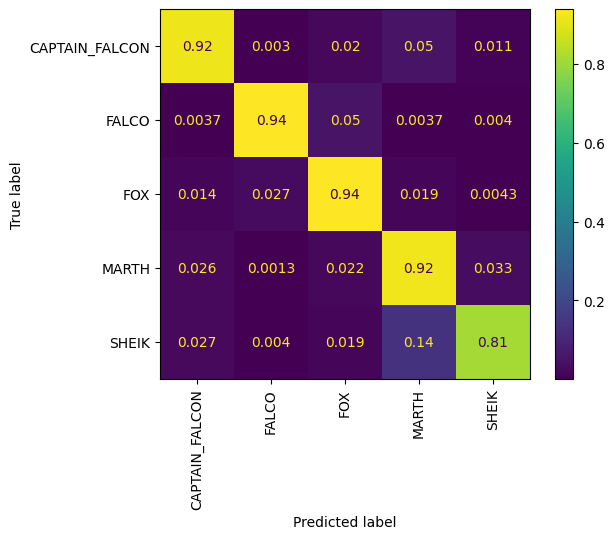

In [30]:
batch_size = 32
epochs = 30

model = CNNClassifier(verbose = 1, n_epochs=epochs, batch_size=batch_size, loss = 'categorical_crossentropy', random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of CNN:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', xticks_rotation='vertical')
plt.show()

tf.compat.v1.reset_default_graph()

In [31]:
batch_size = 32
epochs = 30

model = ResNetClassifier(verbose = 1, n_epochs=epochs, batch_size=batch_size, loss = 'categorical_crossentropy', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of ResNet: ', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', xticks_rotation='vertical')
plt.show()
tf.compat.v1.reset_default_graph()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 1024, 9)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 1024, 64)             4672      ['input_8[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 1024, 64)             256       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 1024, 64)             0         ['batch_normalization[0][0

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 1024, 9)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 1024, 32)             288       ['input_6[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 1024, 9)              0         ['input_6[0][0]']             
 D)                                                                                               
                                                                                                  
 conv1d_1 (Conv1D)           (None, 1024, 32)             40960     ['conv1d[0][0]']          

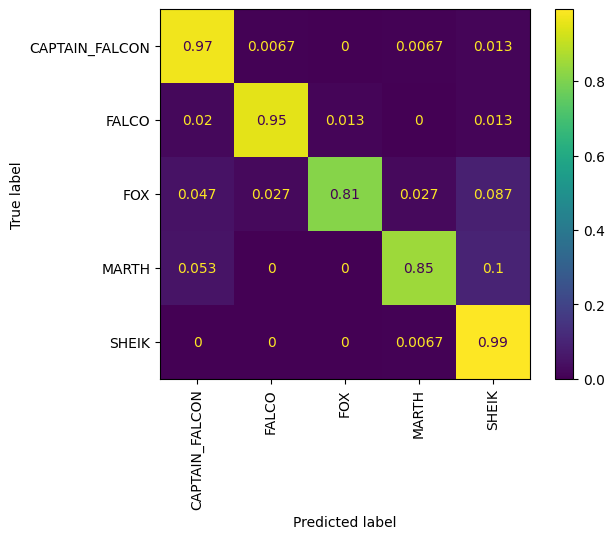

In [ ]:
batch_size = 32
epochs = 30

inceptiontime_model = InceptionTimeClassifier(n_epochs=epochs, batch_size=batch_size,  random_state=42, verbose=True, loss='categorical_crossentropy') 
inceptiontime_model.fit(X_train, y_train) 
y_pred = inceptiontime_model.predict(X_test) 
print('Accuracy of Inception Time:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', xticks_rotation='vertical')
plt.show()
tf.compat.v1.reset_default_graph()

Accuracy of Rocket: 0.8826666666666667


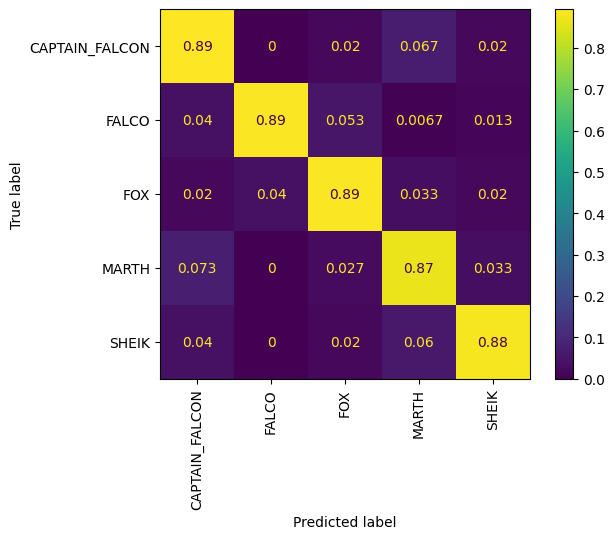

In [ ]:
clf = RocketClassifier(num_kernels=1000, n_jobs=-1, random_state=42, rocket_transform = 'minirocket') 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 
print('Accuracy of Rocket:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize='true', xticks_rotation='vertical')
plt.show()